<h1>                 Horses Vs Human</h1> 

<h2>download the zip from here
    <h3><a href="https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip">https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip</a>

In [10]:
import tensorflow as tf
import os
train_horse_dir=os.path.join('C:/Users/Dell/Desktop/Tensoflow Bitch/Untitled Folder/tmp/horses')
train_human_dir=os.path.join('C:/Users/Dell/Desktop/Tensoflow Bitch/Untitled Folder/tmp/humans')

In [13]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)


print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))

total training horse images: 500
total training human images: 527


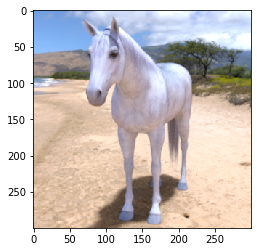

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_path_horse=os.path.join(train_horse_dir,train_horse_names[0])
img_path_human=os.path.join(train_human_dir,train_human_names[0])

img = mpimg.imread(img_path_horse)
plt.imshow(img)



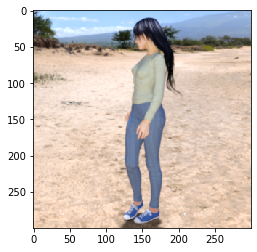

In [30]:
img2 = mpimg.imread(img_path_human)
plt.imshow(img2)

In [32]:
model=tf.keras.models.Sequential([
 
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 33, 33, 64)       

In [35]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255)

train_generator=train_datagen.flow_from_directory(
    'C:/Users/Dell/Desktop/Tensoflow Bitch/Untitled Folder/tmp/',
    target_size=(300 ,300),
    batch_size=128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.


In [39]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1)

  ...
    to  
  ['...']
Train for 8 steps
Epoch 1/15
8/8 [==============================] - 106s 13s/step - loss: 0.7712 - accuracy: 0.4861
Epoch 2/15
8/8 [==============================] - 3778s 472s/step - loss: 0.7395 - accuracy: 0.6263
Epoch 3/15
8/8 [==============================] - 95s 12s/step - loss: 0.5709 - accuracy: 0.8098
Epoch 4/15
8/8 [==============================] - 100s 12s/step - loss: 1.3801 - accuracy: 0.7375
Epoch 5/15
8/8 [==============================] - 100s 13s/step - loss: 0.4560 - accuracy: 0.8432
Epoch 6/15
8/8 [==============================] - 96s 12s/step - loss: 0.2641 - accuracy: 0.8943
Epoch 7/15
8/8 [==============================] - 102s 13s/step - loss: 0.4817 - accuracy: 0.8509
Epoch 8/15
8/8 [==============================] - 98s 12s/step - loss: 0.2484 - accuracy: 0.9288
Epoch 9/15
8/8 [==============================] - 96s 12s/step - loss: 0.1304 - accuracy: 0.9466
Epoch 10/15
8/8 [==============================] - 104s 13s/step - loss: 0.14

[0.]
 is a horse


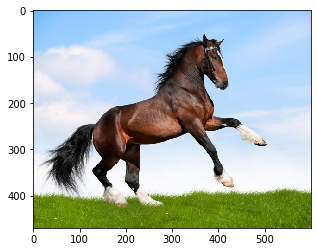

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



img = mpimg.imread('C:\\Users\\Dell\\Downloads\\tryHOrse1.jpg')
plt.imshow(img)




img = image.load_img('C:\\Users\\Dell\\Downloads\\tryHOrse1.jpg', target_size=(300, 300))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print(" is a human")
else:
    print(" is a horse")


C:\Users\Dell\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


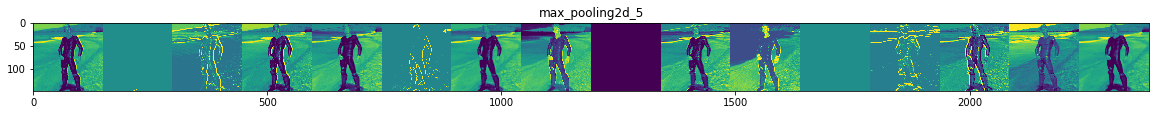

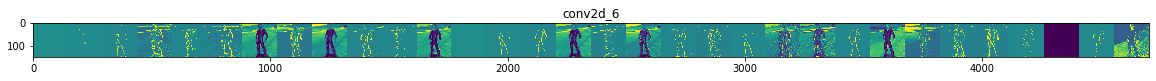

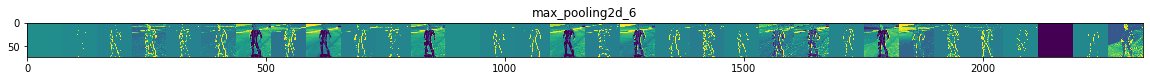

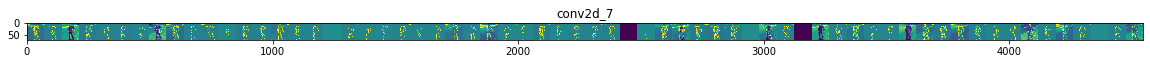

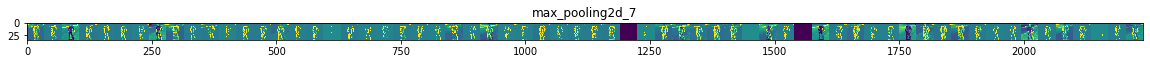

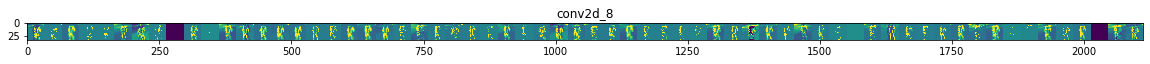

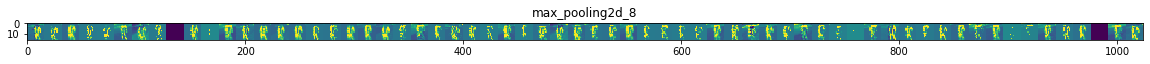

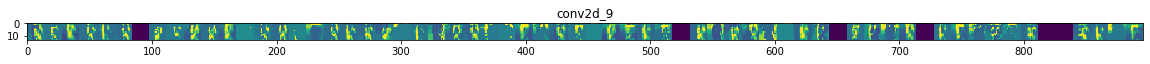

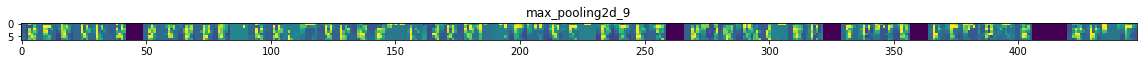

In [49]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers[1:]]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')